In [ ]:
#Hands On
#1. Perform various text pre-processing techniques for review data. 
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag
import spacy
from spellchecker import SpellChecker

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')       
nltk.download('averaged_perceptron_tagger_eng')   
nltk.download('omw-1.4')


nlp = spacy.load('en_core_web_sm')
spell = SpellChecker()

print("NLTK and spaCy loaded successfully.")

sample_text = """
Not much to write about here, but it does exac... The product does exactly as it should and is q...
The primary job of this device is to block the... Nice windscreen protects my MXL mic and preven...
This pop filter is great. It looks and perform...
"""

print("Original text:", sample_text)

tokens = word_tokenize(sample_text.lower())
print("First 30 tokens:", tokens[:30])


unknown_words = spell.unknown(tokens)

corrected_tokens = [
    spell.correction(word) or word if word in unknown_words else word
    for word in tokens
]

corrected_text = " ".join(corrected_tokens)

print("\nFirst 10 corrected tokens:", corrected_tokens[:10])
print("Corrected text:", corrected_text)

pos_tags = pos_tag(corrected_tokens, lang='eng')   
print("\nPOS tags (first 20):", pos_tags[:20])


stop_words = set(stopwords.words('english'))
filtered_tokens = [
    word for word in corrected_tokens
    if word not in stop_words and word not in string.punctuation
]

print("First 20 filtered tokens:", filtered_tokens[:20])

stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
print("First 20 stemmed tokens:", stemmed_tokens[:20])

lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
print("First 20 lemmatized tokens:", lemmatized_tokens[:20])

sentences = sent_tokenize(corrected_text)
print("Number of sentences:", len(sentences))
print("First 3 sentences:", sentences[:3])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arunk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\arunk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arunk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arunk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\arunk\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\arunk\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_pe

NLTK and spaCy loaded successfully.
Original text: 
Not much to write about here, but it does exac... The product does exactly as it should and is q...
The primary job of this device is to block the... Nice windscreen protects my MXL mic and preven...
This pop filter is great. It looks and perform...

First 30 tokens: ['not', 'much', 'to', 'write', 'about', 'here', ',', 'but', 'it', 'does', 'exac', '...', 'the', 'product', 'does', 'exactly', 'as', 'it', 'should', 'and', 'is', 'q', '...', 'the', 'primary', 'job', 'of', 'this', 'device', 'is']

First 10 corrected tokens: ['not', 'much', 'to', 'write', 'about', 'here', ',', 'but', 'it', 'does']
Corrected text: not much to write about here , but it does exact ... the product does exactly as it should and is q ... the primary job of this device is to block the ... nice windscreen protects my mil mic and prevent ... this pop filter is great . it looks and perform ...

POS tags (first 20): [('not', 'RB'), ('much', 'JJ'), ('to', 'TO'), ('write

In [ ]:
#2. Extraction of text features using BoW, N-Gram, TF-IDF, NER, Word2VEC, Glove and Fast Text 
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd


data = fetch_20newsgroups(
    subset='train',
    categories=['comp.graphics', 'sci.space'],
    remove=('headers', 'footers', 'quotes')
)


labels = [data.target_names[i] for i in data.target]

df = pd.DataFrame({'text': data.data, 'target': labels})
print("Dataset shape:", df.shape)
print("Sample text:", df['text'].iloc[0][:200])


vectorizer_bow = CountVectorizer(max_features=1000, stop_words='english')
bow_matrix = vectorizer_bow.fit_transform(df['text'])
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer_bow.get_feature_names_out())
print("BoW shape:", bow_df.shape)
print("Top 20 frequent words:", bow_df.sum().sort_values(ascending=False).head(20))


vectorizer_ngram = CountVectorizer(ngram_range=(2, 2), max_features=100, stop_words='english')
ngram_matrix = vectorizer_ngram.fit_transform(df['text'])
print("\nTop 10 bigrams:", pd.Series(
    ngram_matrix.sum(axis=0).A1,
    index=vectorizer_ngram.get_feature_names_out()
).sort_values(ascending=False).head(10))


vectorizer_tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = vectorizer_tfidf.fit_transform(df['text'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer_tfidf.get_feature_names_out())
print("TF-IDF shape:", tfidf_df.shape)
print("Top 20 TF-IDF words:", tfidf_df.sum().sort_values(ascending=False).head(20))

entities = []
for doc in nlp.pipe(df['text'].head(10)):  
    for ent in doc.ents:
        entities.append((ent.text, ent.label_))

ner_df = pd.DataFrame(entities, columns=['Entity', 'Label'])
print("NER examples:\n", ner_df.groupby('Label').count().sort_values('Entity', ascending=False))


Dataset shape: (1177, 2)
Sample text: 
I usually use "Algorithms for graphics and image processing" by
Theodosios Pavlidis, but other people here got them same idea and now
3 of 4 copies in the libraries have been stolen!

Another referen
BoW shape: (1177, 1000)
Top 20 frequent words: space          1052
image           516
data            435
edu             429
nasa            414
graphics        414
like            389
use             359
program         355
time            312
available       310
just            307
don             306
software        293
know            289
images          285
file            278
launch          270
jpeg            270
information     257
dtype: int64

Top 10 bigrams: nasa gov            95
anonymous ftp       69
space shuttle       69
space station       68
image processing    60
sci space           59
comp graphics       50
24 bit              50
don know            50
thanks advance      44
dtype: int64
TF-IDF shape: (1177, 1000)
Top 20 TF-IDF 

In [ ]:

from gensim.models import Word2Vec
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models.fasttext import FastText

tokenized_docs = [word_tokenize(text.lower()) for text in df['text']]

w2v_model = Word2Vec(sentences=tokenized_docs, vector_size=100, window=5, min_count=1, workers=4)
w2v_model.save("word2vec.model")
print("Word2Vec vocabulary size:", len(w2v_model.wv.key_to_index))

similar_to_graphics = w2v_model.wv.most_similar('graphics', topn=5)
print("Similar to 'graphics':", similar_to_graphics)

result = w2v_model.wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)
print("Analogy (king - man + woman):", result)

ft_model = FastText(tokenized_docs, vector_size=100, window=5, min_count=1, epochs=10)
similar_ft = ft_model.wv.most_similar('space', topn=5)
print("FastText similar to 'space':", similar_ft)


Word2Vec vocabulary size: 23193
Similar to 'graphics': [('times', 0.9979739189147949), ('director', 0.997879683971405), ('animation', 0.9977372288703918), ('silicon', 0.9976618885993958), ('technical', 0.9975444674491882)]
Analogy (king - man + woman): [('is', 0.8752944469451904)]
FastText similar to 'space': [('_space', 0.9933161735534668), ('3-space', 0.990556001663208), ('obspace', 0.9889735579490662), ('uaf/space', 0.9882420301437378), ('space-', 0.9848542213439941)]


In [ ]:
#3.Implement the Deep learning algorithm for sentiment analysis 
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer

max_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)
print("Train samples:", len(x_train))
print("First review length:", len(x_train[0]))

max_len = 500
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)


model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_split=0.2)

print("Training completed.")

loss, acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {acc:.3f}")

sample_review = x_test[0:1]
pred = model.predict(sample_review)
print("Sample prediction (positive if >0.5):", pred[0][0])


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Train samples: 25000
First review length: 218


c:\Users\arunk\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 166s 258ms/step - accuracy: 0.7703 - loss: 0.4855 - val_accuracy: 0.8394 - val_loss: 0.3774
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 194s 310ms/step - accuracy: 0.8457 - loss: 0.3650 - val_accuracy: 0.8134 - val_loss: 0.4087
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 134s 214ms/step - accuracy: 0.8595 - loss: 0.3385 - val_accuracy: 0.8094 - val_loss: 0.4283
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 124s 198ms/step - accuracy: 0.8897 - loss: 0.2750 - val_accuracy: 0.8350 - val_loss: 0.4108
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 124s 199ms/step - accuracy: 0.9181 - loss: 0.2143 - val_accuracy: 0.8514 - val_loss: 0.3974
Training completed.
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.8526 - loss: 0.3966
Test Accuracy: 0.853
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
Sample prediction (positive if >0.5): 0.03947642


In [ ]:
#4.Work with transformer architecture using various attention mechanism 
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import torch



texts = [
    "I loved this product, it works perfectly!",
    "Amazing experience, I will buy again.",
    "The quality is great and I’m happy.",
    "Very good and useful item.",
    "Absolutely fantastic!",

    "This is terrible, I hate it.",
    "Worst experience ever.",
    "The product broke immediately.",
    "Very poor quality, not recommended.",
    "I will never buy this again."
]

labels = [1,1,1,1,1, 0,0,0,0,0]  

dataset = Dataset.from_dict({
    "text": texts,
    "labels": labels
})

print(dataset)



tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

def tokenize(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True, max_length=128)

tokenized_dataset = dataset.map(tokenize)
tokenized_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])



model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)


training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    logging_dir="./logs",
    use_cpu=True,          
    disable_tqdm=False
)



trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,
    eval_dataset=tokenized_dataset
)

trainer.train()



results = trainer.evaluate()
print("Evaluation:", results)


Dataset({
    features: ['text', 'labels'],
    num_rows: 10
})


Map:   0%|          | 0/10 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss


Evaluation: {'eval_loss': 0.5417690277099609, 'eval_runtime': 0.6647, 'eval_samples_per_second': 15.044, 'eval_steps_per_second': 7.522, 'epoch': 3.0}


In [ ]:
#Assignments
"""1. You have to take any text corpus as a “file.txt” that is in improper format. You will 
perform all the below pre-processing steps: 
a. Import the necessary libraries 
b. Load the text corpus to a variable 
c. Apply the tokenization process to the text corpus and print the first 30 tokens 
d. Apply spelling correction on each token and print the initial 10 corrected tokens as 
well as the corrected text corpus 
e. Apply POS tags to each corrected token and print them 
f. 
Remove stop words from the corrected token list and print the initial 20 tokens 
g. Apply stemming and lemmatization to the corrected token list and the print initial 20 
tokens 
h. Detect the sentence boundaries in the given text corpus and print the total number of 
sentences. """
import pandas as pd  
from sklearn.datasets import fetch_20newsgroups
import re

categories = ['comp.graphics', 'rec.sport.baseball', 'sci.space', 'talk.religion.misc']  
data = fetch_20newsgroups(
    subset='train', 
    categories=categories, 
    remove=('headers', 'footers', 'quotes'),  
    random_state=42
)


full_corpus = '\n\n'.join(data.data[:50])  

print("Dataset loaded: 20 Newsgroups (50 documents from 4 categories).")
print("Categories:", data.target_names)
print("Corpus length:", len(full_corpus))
print("Preview (first 300 chars):", full_corpus[:300])


# Tokenize the full corpus (lowercase for consistency)
tokens_full = word_tokenize(full_corpus.lower())
print("Total tokens:", len(tokens_full))
print("First 30 tokens:", tokens_full[:30])

# Find unknown words and correct them
unknown_words_full = spell.unknown(tokens_full)
corrected_tokens_full = [
    spell.correction(word) or word if word in unknown_words_full else word
    for word in tokens_full
]

corrected_text_full = " ".join(corrected_tokens_full)
print("Number of unknown words:", len(unknown_words_full))
print("First 10 corrected tokens:", corrected_tokens_full[:10])
print("Corrected text preview:", corrected_text_full[:200])

# POS tagging on corrected tokens
pos_tags_full = pos_tag(corrected_tokens_full, lang='eng')
print("Total POS tags:", len(pos_tags_full))
print("POS tags (first 20):", pos_tags_full[:20])

# Optional: Count POS distribution
pos_counts = pd.Series([tag[1] for tag in pos_tags_full]).value_counts()
print("\nTop 5 POS tags:", pos_counts.head())

# Filter out stop words and punctuation
filtered_tokens_full = [
    word for word in corrected_tokens_full
    if word not in stop_words and word not in string.punctuation and len(word) > 2
]
print("Tokens after filtering:", len(filtered_tokens_full))
print("First 20 filtered tokens:", filtered_tokens_full[:20])

# Stemming on filtered tokens
stemmed_tokens_full = [stemmer.stem(word) for word in filtered_tokens_full]
print("First 20 stemmed tokens:", stemmed_tokens_full[:20])

# Lemmatization on filtered tokens
lemmatized_tokens_full = [lemmatizer.lemmatize(word) for word in filtered_tokens_full]
print("First 20 lemmatized tokens:", lemmatized_tokens_full[:20])

# Compare lengths
print(f"\nOriginal filtered: {len(filtered_tokens_full)}, Stemmed: {len(set(stemmed_tokens_full))}, Lemmatized: {len(set(lemmatized_tokens_full))}")

# Sentence tokenization on corrected text
sentences_full = sent_tokenize(corrected_text_full)
print("Total number of sentences:", len(sentences_full))
print("First 3 sentences:", sentences_full[:3])

# Average sentence length
avg_sentence_len = sum(len(sent_tokenize(sent)) for sent in sentences_full) / len(sentences_full) if sentences_full else 0
print("Average words per sentence:", avg_sentence_len)

# Create summary DataFrame for evaluation
summary = {
    'Stage': ['Original Tokens', 'Corrected Tokens', 'Filtered Tokens', 'Stemmed Unique', 'Lemmatized Unique', 'Sentences'],
    'Count': [len(tokens_full), len(corrected_tokens_full), len(filtered_tokens_full),
              len(set(stemmed_tokens_full)), len(set(lemmatized_tokens_full)), len(sentences_full)]
}

summary_df = pd.DataFrame(summary)
print("Preprocessing Pipeline Summary:\n", summary_df)

# Save cleaned corpus (optional)
with open('cleaned_corpus.txt', 'w') as f:
    f.write(' '.join(lemmatized_tokens_full))  # Use lemmatized as final cleaned version

print("\nCleaned corpus saved to 'cleaned_corpus.txt'.")


Dataset loaded: 20 Newsgroups (50 documents from 4 categories).
Categories: ['comp.graphics', 'rec.sport.baseball', 'sci.space', 'talk.religion.misc']
Corpus length: 29092
Preview (first 300 chars): : >Based on the amount of E-Mail from fellow Christians who have read the
: >posts and told me I was wasting my time with Butler and Joslin, I told
: >them I wasn't doing it for DB or  DJ but for other Christians.  They
: >have told me that DB's and DJ's arguments won't convince most Bible
: >studyi
Total tokens: 5947
First 30 tokens: [':', '>', 'based', 'on', 'the', 'amount', 'of', 'e-mail', 'from', 'fellow', 'christians', 'who', 'have', 'read', 'the', ':', '>', 'posts', 'and', 'told', 'me', 'i', 'was', 'wasting', 'my', 'time', 'with', 'butler', 'and', 'joslin']
Number of unknown words: 242
First 10 corrected tokens: [':', '>', 'based', 'on', 'the', 'amount', 'of', 'email', 'from', 'fellow']
Corrected text preview: : > based on the amount of email from fellow christians who have read the :

Loaded 500 documents from 4 categories.
Sample document (first 200 chars): : >Based on the amount of E-Mail from fellow Christians who have read the
: >posts and told me I was wasting my time with Butler and Joslin, I told
: >them I wasn't doing it for DB or  DJ but for othe
Category distribution:
 rec.sport.baseball    150
comp.graphics         141
sci.space             135
talk.religion.misc     74
Name: count, dtype: int64
Cleaned documents: 470 (filtered short ones)
Sample cleaned doc: based on the amount of e mail from fellow christians who have read the posts and told me i was wasting my time with butler and joslin i told them i wasn t doing it for db or dj but for other christian
BoW Matrix Shape: (470, 2000)
Sparsity: 1.60% non-zero

Top 20 BoW Words:
 don         149
like        145
think       136
just        126
know        112
does        110
good        107
year        107
space       100
time         97
people       92
graphics     83
use          77
jesus        74
god  

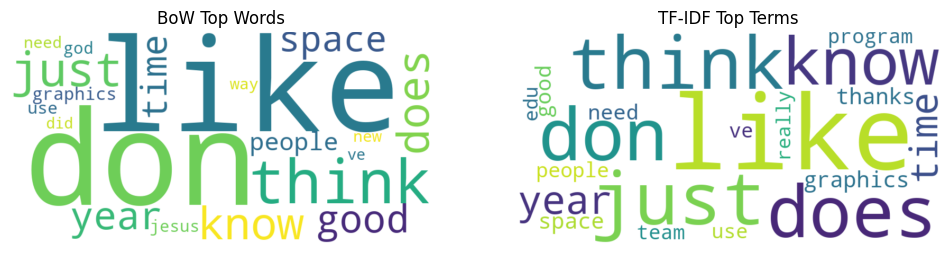

In [ ]:
"""2. You will extract the specific features from the texts present in the dataset. The dataset that 
will be using here is fetch_20newsgroups, provided by sklearn library. Follow these steps to 
implement this activity: 
a. Import the necessary packages 
b. Fetch the dataset provided by sklearn and store the data in a Dataframe. 
c. Clean the data in the Dataframe. 
d. Create a BoW model 
e. Create a TF_IDF model 
f. Compare both models on the basis of the 20 most frequently occurring words. """

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud  
import re

categories = ['comp.graphics', 'rec.sport.baseball', 'sci.space', 'talk.religion.misc']
data = fetch_20newsgroups(
    subset='train', 
    categories=categories, 
    remove=('headers', 'footers', 'quotes'),
    random_state=42
)


documents = data.data[:500]
labels = data.target[:500]
category_names = data.target_names

print(f"Loaded {len(documents)} documents from {len(category_names)} categories.")
print("Sample document (first 200 chars):", documents[0][:200])
print("Category distribution:\n", pd.Series([category_names[label] for label in labels]).value_counts())


cleaned_docs = []
for doc in documents:
   
    cleaned = re.sub(r'[^a-zA-Z\s\.\?!]', ' ', doc.lower())
    cleaned = re.sub(r'\s+', ' ', cleaned).strip()  
    if len(cleaned.split()) > 10:  
        cleaned_docs.append(cleaned)

print(f"Cleaned documents: {len(cleaned_docs)} (filtered short ones)")
print("Sample cleaned doc:", cleaned_docs[0][:200])


vectorizer_bow = CountVectorizer(
    max_features=2000,  
    stop_words='english',
    min_df=2,
    max_df=0.8 
)

bow_matrix = vectorizer_bow.fit_transform(cleaned_docs)
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer_bow.get_feature_names_out())

print("BoW Matrix Shape:", bow_matrix.shape)
print("Sparsity:", f"{100 * (bow_matrix.nnz / (bow_matrix.shape[0] * bow_matrix.shape[1])):.2f}% non-zero")


bow_freq = bow_df.sum().sort_values(ascending=False).head(20)
print("\nTop 20 BoW Words:\n", bow_freq)


vectorizer_bigram = CountVectorizer(
    ngram_range=(2, 2),  
    max_features=500,
    stop_words='english',
    min_df=2
)

bigram_matrix = vectorizer_bigram.fit_transform(cleaned_docs)
bigram_freq = pd.Series(
    bigram_matrix.sum(axis=0).A1, 
    index=vectorizer_bigram.get_feature_names_out()
).sort_values(ascending=False).head(20)

print("Bigram Matrix Shape:", bigram_matrix.shape)
print("Top 20 Bigrams:\n", bigram_freq.head(20))

vectorizer_trigram = CountVectorizer(ngram_range=(3, 3), max_features=100, stop_words='english')
trigram_matrix = vectorizer_trigram.fit_transform(cleaned_docs)
trigram_freq = pd.Series(
    trigram_matrix.sum(axis=0).A1, 
    index=vectorizer_trigram.get_feature_names_out()
).sort_values(ascending=False).head(10)

print("\nTop 10 Trigrams:\n", trigram_freq)

vectorizer_tfidf = TfidfVectorizer(
    max_features=2000,
    stop_words='english',
    min_df=2,
    max_df=0.8,
    ngram_range=(1, 2)  
)

tfidf_matrix = vectorizer_tfidf.fit_transform(cleaned_docs)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer_tfidf.get_feature_names_out())

print("TF-IDF Matrix Shape:", tfidf_matrix.shape)
print("Sparsity:", f"{100 * (tfidf_matrix.nnz / (tfidf_matrix.shape[0] * tfidf_matrix.shape[1])):.2f}% non-zero")


tfidf_freq = tfidf_df.sum().sort_values(ascending=False).head(20)
print("\nTop 20 TF-IDF Terms:\n", tfidf_freq)

metrics = {
    'Method': ['BoW', 'Bigram', 'TF-IDF'],
    'Features': [bow_matrix.shape[1], bigram_matrix.shape[1], tfidf_matrix.shape[1]],
    'Non-Zero Elements': [bow_matrix.nnz, bigram_matrix.nnz, tfidf_matrix.nnz],
    'Sparsity (%)': [100 * (1 - bow_matrix.nnz / (bow_matrix.shape[0] * bow_matrix.shape[1])),
                     100 * (1 - bigram_matrix.nnz / (bigram_matrix.shape[0] * bigram_matrix.shape[1])),
                     100 * (1 - tfidf_matrix.nnz / (tfidf_matrix.shape[0] * tfidf_matrix.shape[1]))]
}

metrics_df = pd.DataFrame(metrics)
print("Feature Extraction Comparison:\n", metrics_df.round(2))

bow_top20 = set(bow_freq.head(20).index)
tfidf_top20 = set(tfidf_freq.head(20).index)
overlap = bow_top20.intersection(tfidf_top20)
print(f"\nTop 20 Overlap (BoW vs TF-IDF): {len(overlap)} words")
print("Common words:", list(overlap))

bow_wc = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(bow_freq.head(50).to_dict())

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(bow_wc, interpolation='bilinear')
plt.title('BoW Top Words')
plt.axis('off')

tfidf_wc = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(tfidf_freq.head(50).to_dict())

plt.subplot(1, 2, 2)
plt.imshow(tfidf_wc, interpolation='bilinear')
plt.title('TF-IDF Top Terms')
plt.axis('off')

plt.show()



<>:27: SyntaxWarning: invalid escape sequence '\w'
<>:27: SyntaxWarning: invalid escape sequence '\w'
C:\Users\arunk\AppData\Local\Temp\ipykernel_3336\4221013055.py:27: SyntaxWarning: invalid escape sequence '\w'
  df['clean_text'] = df['reviewText'].str.lower().str.replace('[^\w\s]', '', regex=True)


Cleaned data shape: (10, 3)
Logistic Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Naive Bayes Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

KNN Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33     

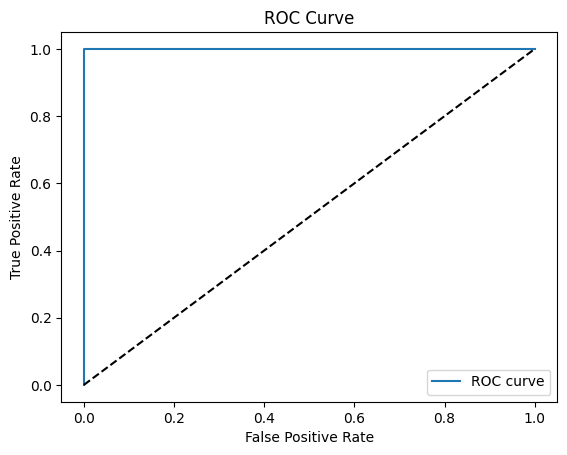

In [ ]:
"""3.Consider the review and score of the amazon musical instruments as given below and do 
the following operations 
reviewText Overall 
Not much to write about here, but it does exac... 5 
The product does exactly as it should and is q... 4 
The primary job of this device is to block the... 3 
Nice windscreen protects my MXL mic and preven... 5 
This pop filter is great. It looks and perform... 4 
So good that I bought another one. Love the h... 4 
I have used monster cables for years, and with... 5 
I now use this cable to run from the output of... 5 
Perfect for my Epiphone Sheraton II. Monster ... 3 
Monster makes the best cables and a lifetime w... 4 
a. import the necessary library 
b. clean the given reviewText 
c. construct the data frame with TF-IDF model for extracting independent variables. 
d. do the classification (Logistic Regression, NaiveBayes, KNN,  decision tree classifier 
random forest classifier, GBM, XGBoost) and Regression (linear regression, decision 
tree regression, random forest regressor, Gradient Boosting Regressor, 
XGBRegressor) for reviewText and Overall. 
e. Evaluate the models for developed using parameters such as confusion matrix, 
accuracy, precision, recall, F1 plot curve and ROC curve. """

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
import warnings; warnings.filterwarnings('ignore')

data = {
    'reviewText': [
        "Not much to write about here, but it does exac...", "The product does exactly as it should and is q...",
        "The primary job of this device is to block the...", "Nice windscreen protects my MXL mic and preven...",
        "This pop filter is great. It looks and perform...", "So good that I bought another one. Love the h...",
        "I have used monster cables for years, and with...", "I now use this cable to run from the output of...",
        "Perfect for my Epiphone Sheraton II. Monster ...", "Monster makes the best cables and a lifetime w..."
    ],
    'Overall': [5, 4, 3, 5, 4, 4, 5, 5, 3, 4]
}
df = pd.DataFrame(data)

df['clean_text'] = df['reviewText'].str.lower().str.replace('[^\w\s]', '', regex=True)
print("Cleaned data shape:", df.shape)

vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['clean_text'])
y_class = (df['Overall'] > 3).astype(int) 
y_reg = df['Overall']

X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)
_, _, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

classifiers = {
    'Logistic': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'GBM': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train_class)
    y_pred = clf.predict(X_test)
    results[name] = classification_report(y_test_class, y_pred, output_dict=True)
    print(f"{name} Report:\n", classification_report(y_test_class, y_pred))

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, roc_curve, auc
import matplotlib.pyplot as plt

regressors = {
    'Linear Reg': LinearRegression(),
    'DT Reg': DecisionTreeRegressor(),
    'RF Reg': RandomForestRegressor(),
    'GB Reg': GradientBoostingRegressor(),
    'XGB Reg': XGBRegressor()
}

for name, reg in regressors.items():
    reg.fit(X_train, y_train_reg)
    y_pred_reg = reg.predict(X_test)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    print(f"{name} MSE: {mse:.2f}")


y_prob = classifiers['Logistic'].predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test_class, y_prob)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
"""4. Download the IMDB dataset for sentiment analysis from the given link and do the 
following operations: 
https://www.kaggle.com/columbine/imdb-dataset-sentiment-analysis-in-csv
format?select=Test.csv 
a. Import the necessary libraries 
b. Load the CSV file 
c. Fetch the text column from the DataFrame 
d. Extract and remove the handles from the fetched data 
e. Perform sentiment analysis and get the new DataFrame 
f. Join both the Dataframes 
g. Apply appropriate conditions and view positive, negative and neutral tweets"""

df_imdb = pd.read_csv(r'c:\Users\arunk\Downloads\IMDB Dataset.csv\IMDB Dataset.csv')
df_imdb['clean_review'] = df_imdb['review'].str.lower().str.replace('@\w+', '', regex=True)
print("IMDB shape:", df_imdb.shape)

from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0.05:
        return 'positive'
    elif polarity < -0.05:
        return 'negative'
    else:
        return 'neutral'

df_imdb['predicted_sentiment'] = df_imdb['clean_review'].apply(get_sentiment)
comparison = pd.crosstab(df_imdb['sentiment'], df_imdb['predicted_sentiment'])
print("Sentiment comparison:\n", comparison)

print("\nCounts:\n", df_imdb['predicted_sentiment'].value_counts())


IMDB shape: (50000, 3)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\arunk\AppData\Roaming\nltk_data...


Sentiment comparison:
 predicted_sentiment  negative  neutral  positive
sentiment                                       
negative                 7151     7825     10024
positive                  580     2230     22190

Counts:
 predicted_sentiment
positive    32214
neutral     10055
negative     7731
Name: count, dtype: int64
